In [2]:
import pandas as pd
import os

In [9]:
%matplotlib inline

In [7]:
path_to_data = os.path.join('data_csv/')

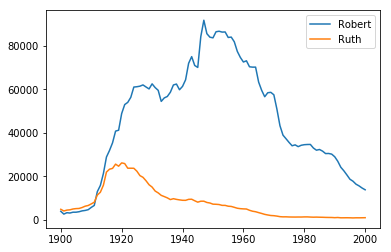

In [19]:
names_by_year = {}

for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        f'{path_to_data}yob{year}.txt', 
        names = ['Name', 'Gender', 'Count'])
    
all_names = pd.concat(names_by_year)

ruth_and_robert = all_names[all_names['Name'].isin(['Ruth', 'Robert'])]
ruth_and_robert = ruth_and_robert.reset_index(level=1, drop=True)
ruth_and_robert = ruth_and_robert.groupby([ruth_and_robert.index, 'Name']).sum()

ax = names_all.unstack('Name').plot()
ax.legend(labels = ['Robert', 'Ruth'])

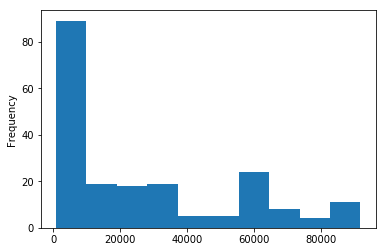

In [20]:
names_by_year = {}

for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        f'{path_to_data}yob{year}.txt', 
        names = ['Name', 'Gender', 'Count'])
    
all_names = pd.concat(names_by_year)

ruth_and_robert = all_names[all_names['Name'].isin(['Ruth', 'Robert'])]
ruth_and_robert = ruth_and_robert.reset_index(level=1, drop=True)
ruth_and_robert = ruth_and_robert.groupby([ruth_and_robert.index, 'Name']).sum()

names_all.plot(kind='hist', legend=False)

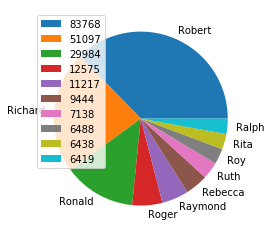

In [22]:
names_by_year = pd.read_csv(f'{path_to_data}yob1950.txt', names = ['Name', 'Gender', 'Count'])

specific_names_df = names_by_year[names_by_year['Name'].str.contains('|'.join('R'))]

names_dynamics = specific_names_df.groupby('Name').sum().sort_values('Count', ascending=False).head(10)

ax = names_dynamics.plot(kind='pie', y='Count', legend=False)
ax.set_ylabel('')
ax.legend(names_dynamics['Count'])

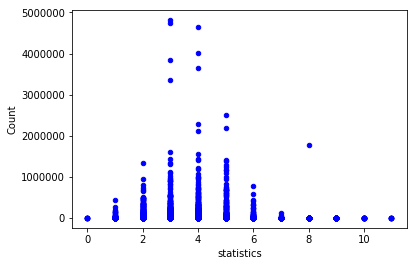

In [46]:
names_by_years = []

for year in range(1900, 2001):
    names_by_year = pd.read_csv(f'{path_to_data}yob{year}.txt', names = ['Name', 'Gender', 'Count'])
    names_by_years.append(names_by_year)
    
all_names = pd.concat(list_years).groupby('Name').sum()

def get_name_statistics(text):
    consonants = set("bcdfghjklmnpqrstvwxyz")
    return sum(1 for letter in text.lower() if letter in consonants)

all_names['statistics'] = all_names.index.map(get_name_statistics)
plot = all_names.plot(kind='scatter', y='Count', x='statistics', c='blue')
plot